In [1]:
from glob import glob
import os
import sys
from itertools import accumulate
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 14})

sys.path.append('../../')
import utils

In [2]:
dir_path = '../../trained_models'
log_paths = glob(dir_path + '/**/log.json', recursive=True)
title = '1120'

In [3]:
def get_log(log_path):    
    exp_path = log_path.replace('log.json', 'exp.json')
    conf = utils.read_json(exp_path)
    logs = utils.read_json(log_path)

    epochs = [int(i) for i in logs['epoch'].keys()]
    new_log = {'epoch': epochs}

    for epoch in epochs:
        log = logs['epoch'][str(epoch)]

        for k, v in log.items():
            if isinstance(v, dict):
                prefix = k[:5]
                for kk, vv in v.items():
                    new_key = f'{prefix}_{kk}'
                    new_log.setdefault(new_key, []).append(vv)

            else:
                new_log.setdefault(k, []).append(v)

    runtime = [(x+y)/3600 for x, y in zip(new_log['train_run_time'], new_log['valid_run_time'])]
    time = list(accumulate(runtime))
    
    new_log['time'] = time
    new_log['max_train_dice'] = max(new_log['train_dice'])
    new_log['max_valid_dice'] = max(new_log['valid_dice'])
    new_log['name'] = conf['run_name'] + f"_vdice_{new_log['max_valid_dice']:.3f}"

    return new_log, conf

def set_yscale_log(axes):
    for ax in axes:
        ax.set_yscale('log', base=10)

def set_legend(axes, fontsize=12):
    for ax in axes:
        ax.legend(fontsize=fontsize)

def set_xlabel_epoch(axes):
    for ax in axes:
        ax.set_xlabel('Epoch')

def set_xlabel_time(axes):
    for ax in axes:
        ax.set_xlabel('Time (hour)')
        

def set_ylabel_loss(axes):
    for ax in axes:
        ax.set_ylabel('Loss')

def set_ylabel_acc(axes):
    for ax in axes:
        ax.set_ylabel('Accuracy')

def sort_log_paths_by_max_valid_dice(log_paths):
    new_log_paths = []
    max_valid_dices = []

    for log_path in log_paths:
        log, conf = get_log(log_path)
        max_valid_dice = log['max_valid_dice']

        new_log_paths.append(log_path)
        max_valid_dices.append(max_valid_dice)

    new_log_paths = np.array(new_log_paths)
    max_valid_dices = np.array(max_valid_dices)

    index = np.argsort(max_valid_dices)[::-1]
    max_valid_dices = max_valid_dices[index]
    new_log_paths = new_log_paths[index]
    
    return new_log_paths

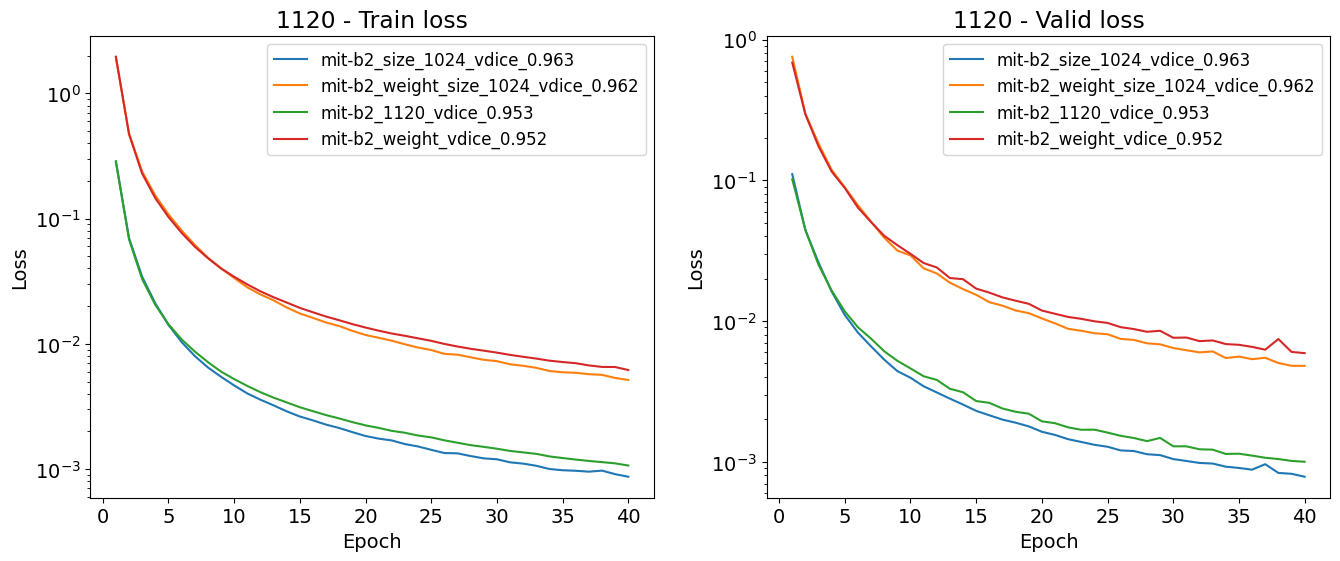

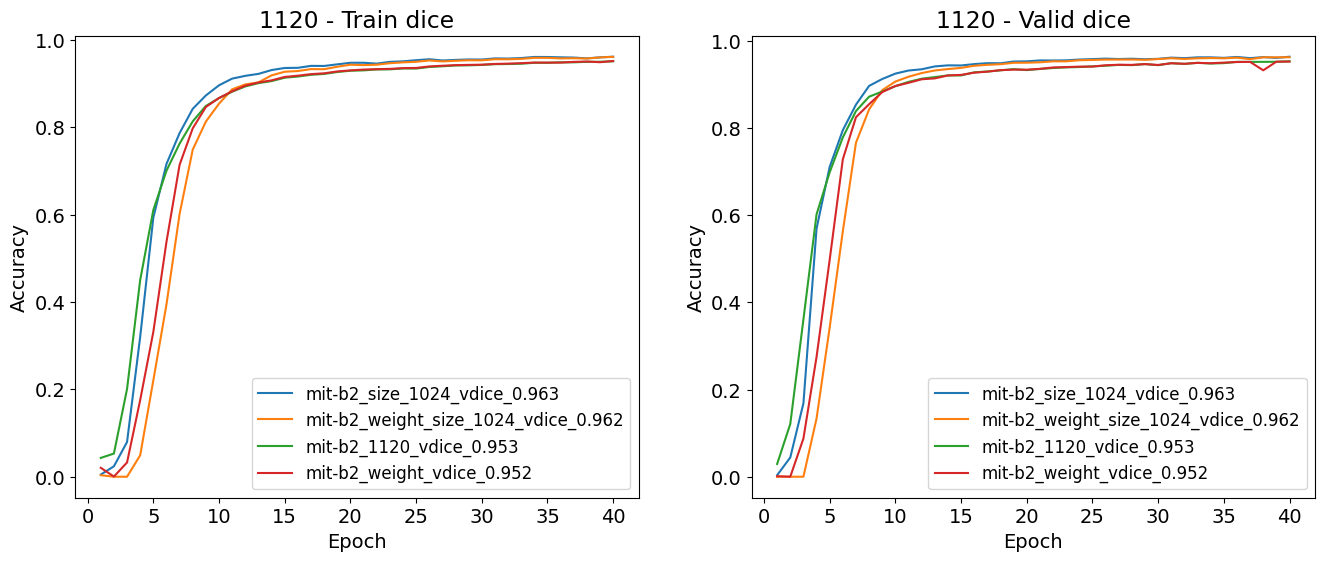

In [4]:
fig1, ax1 = plt.subplots(1, 2, figsize=(16, 6))
fig2, ax2 = plt.subplots(1, 2, figsize=(16, 6))


log_paths = sort_log_paths_by_max_valid_dice(log_paths)

for log_path in log_paths:
    if 'cont' in log_path:
        continue
    log, _ = get_log(log_path)

    ax1[0].plot(log['epoch'], log['train_loss'], label=log['name'])
    ax1[0].set_title(f"{title} - Train loss")

    ax1[1].plot(log['epoch'], log['valid_loss'], label=log['name'])
    ax1[1].set_title(f"{title} - Valid loss")

    ax2[0].plot(log['epoch'], log['train_dice'], label=log['name'])
    ax2[0].set_title(f"{title} - Train dice")

    ax2[1].plot(log['epoch'], log['valid_dice'], label=log['name'])
    ax2[1].set_title(f"{title} - Valid dice")

set_yscale_log(ax1)
set_legend(ax1)
set_legend(ax2)
set_xlabel_epoch(ax1)
set_xlabel_epoch(ax2)
set_ylabel_loss(ax1)
set_ylabel_acc(ax2)

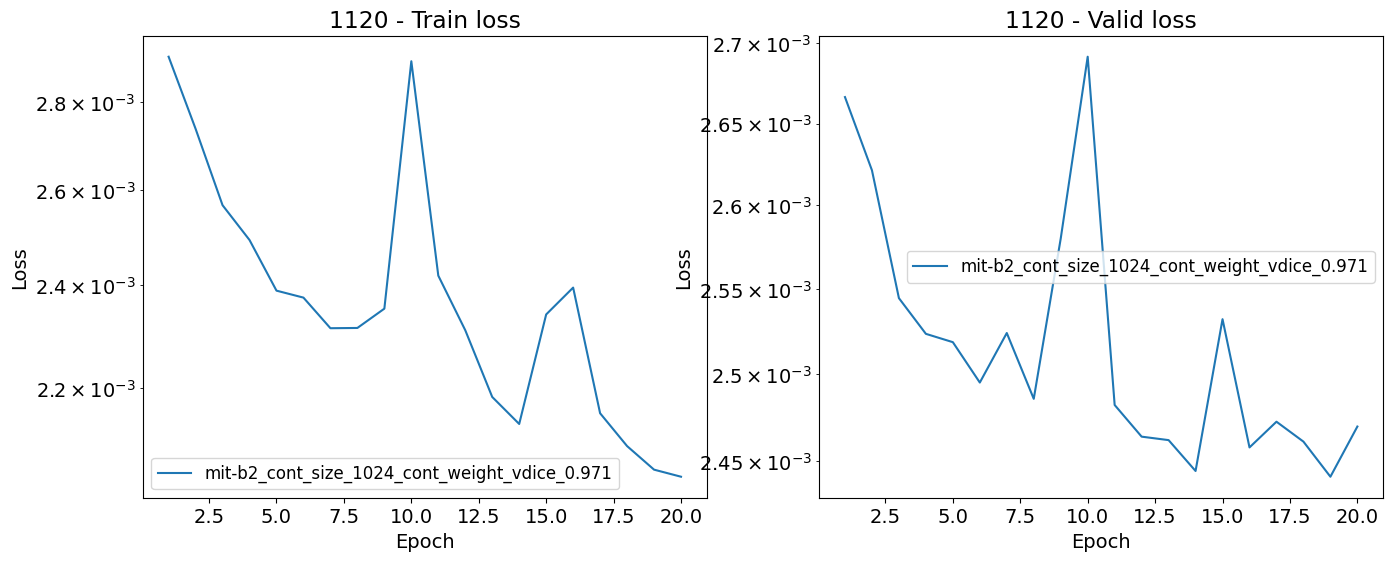

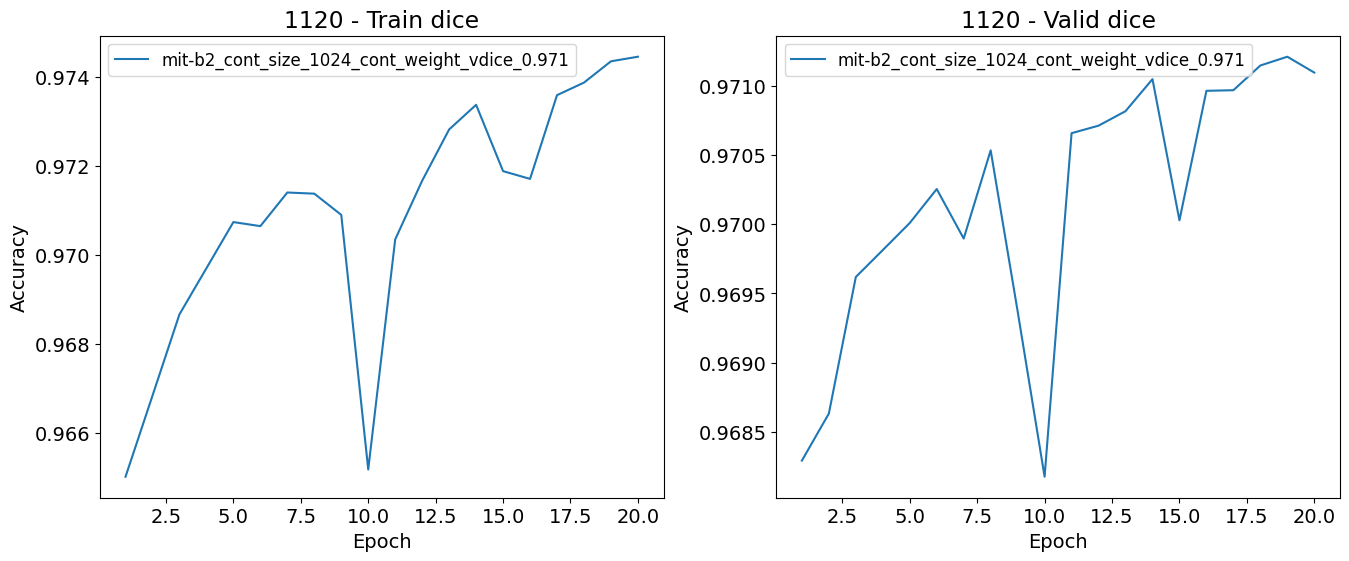

In [5]:

fig1, ax1 = plt.subplots(1, 2, figsize=(16, 6))
fig2, ax2 = plt.subplots(1, 2, figsize=(16, 6))

for log_path in log_paths:
    if 'cont' not in log_path:
        continue
    log, _ = get_log(log_path)

    ax1[0].plot(log['epoch'], log['train_loss'], label=log['name'])
    ax1[0].set_title(f"{title} - Train loss")

    ax1[1].plot(log['epoch'], log['valid_loss'], label=log['name'])
    ax1[1].set_title(f"{title} - Valid loss")

    ax2[0].plot(log['epoch'], log['train_dice'], label=log['name'])
    ax2[0].set_title(f"{title} - Train dice")

    ax2[1].plot(log['epoch'], log['valid_dice'], label=log['name'])
    ax2[1].set_title(f"{title} - Valid dice")

set_yscale_log(ax1)
set_legend(ax1)
set_legend(ax2)
set_xlabel_epoch(ax1)
set_xlabel_epoch(ax2)
set_ylabel_loss(ax1)
set_ylabel_acc(ax2)

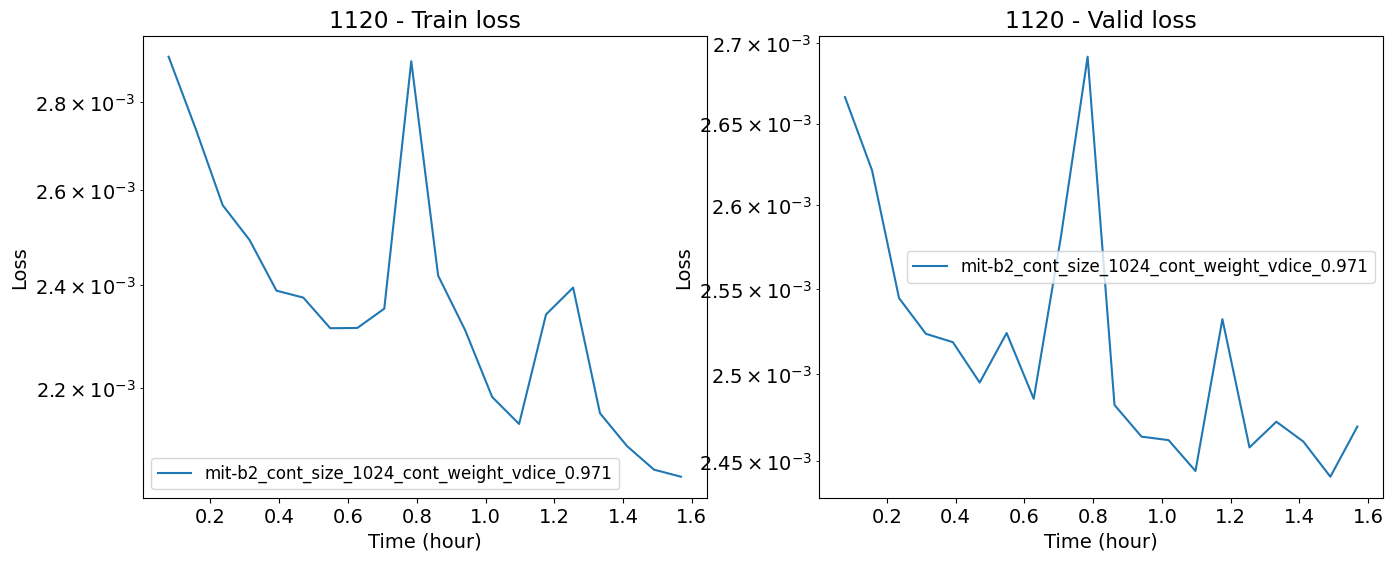

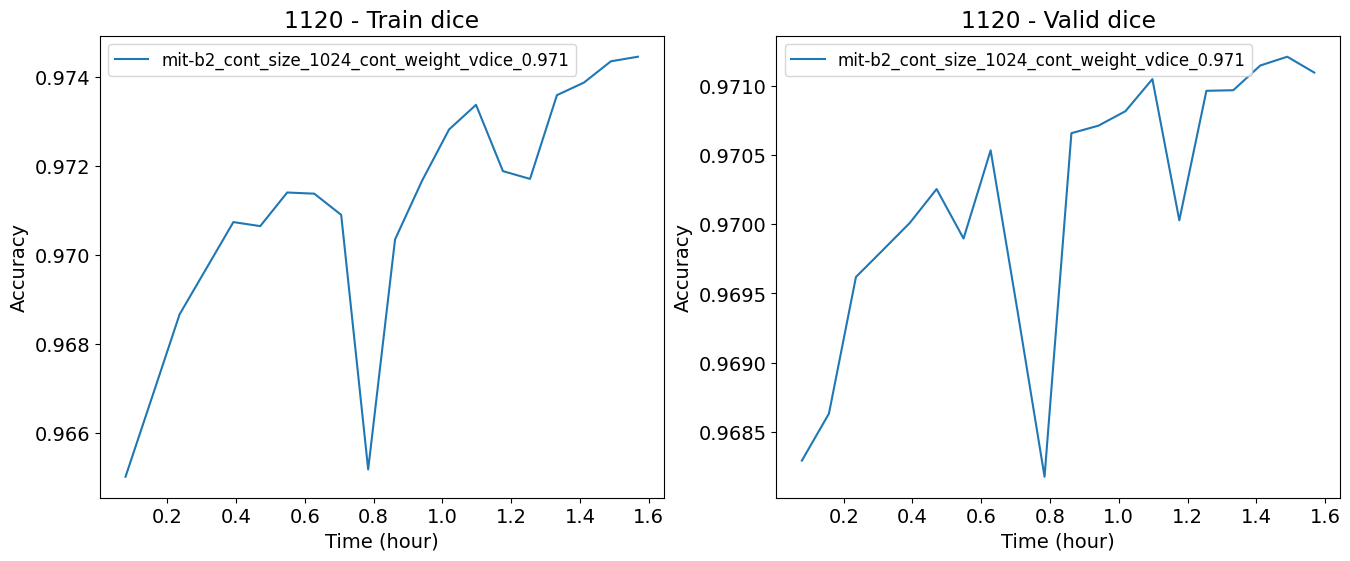

In [6]:
fig1, ax1 = plt.subplots(1, 2, figsize=(16, 6))
fig2, ax2 = plt.subplots(1, 2, figsize=(16, 6))

for log_path in log_paths:
    if 'cont' not in log_path:
        continue
    log, _ = get_log(log_path)

    ax1[0].plot(log['time'], log['train_loss'], label=log['name'])
    ax1[0].set_title(f"{title} - Train loss")

    ax1[1].plot(log['time'], log['valid_loss'], label=log['name'])
    ax1[1].set_title(f"{title} - Valid loss")

    ax2[0].plot(log['time'], log['train_dice'], label=log['name'])
    ax2[0].set_title(f"{title} - Train dice")

    ax2[1].plot(log['time'], log['valid_dice'], label=log['name'])
    ax2[1].set_title(f"{title} - Valid dice")


set_yscale_log(ax1)
set_legend(ax1)
set_legend(ax2)
set_xlabel_time(ax1)
set_xlabel_time(ax2)
set_ylabel_loss(ax1)
set_ylabel_acc(ax2)

In [7]:
# Summary
log_paths = sort_log_paths_by_max_valid_dice(log_paths)

import pandas as pd

df = pd.DataFrame(columns=['name', 'max_train_dice', 'max_valid_dice', 'Time'])

for i, log_path in enumerate(log_paths):
    log, conf = get_log(log_path)

    name = conf['run_name']
    max_train_dice = log['max_train_dice']
    max_valid_dice = log['max_valid_dice']

    df.loc[i] = [name, max_train_dice, max_valid_dice, log['time'][-1]]

df.to_csv('summary.csv', index=False)

In [8]:
df

,name,max_train_dice,max_valid_dice,Time
0,mit-b2_cont_size_1024_cont_weight,0.974460,0.971209,1.568421
1,mit-b2_size_1024,0.961658,0.963494,3.130241
2,mit-b2_weight_size_1024,0.961402,0.962314,3.134738
3,mit-b2_1120,0.951204,0.952946,1.757852
4,mit-b2_weight,0.951837,0.952412,1.763339
